In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

C:\Users\yaser\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
os.chdir('C:/Users/yaser/Finance/Multivariate_regression')

In [3]:
df_raw = pd.read_excel("Housing.xlsx")

In [4]:
df_raw.describe(include = 'all')

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
count,2.000000e+01,20.000000,20,20.000000,20.000000
unique,NaN,NaN,4,NaN,NaN
top,NaN,NaN,IN,NaN,NaN
freq,NaN,NaN,7,NaN,NaN
mean,8.404700e+05,1442.250000,NaN,5.850000,2000.900000
std,1.977988e+05,405.314936,NaN,1.954078,9.497368
min,5.700000e+05,860.000000,NaN,2.000000,1987.000000
25%,6.725000e+05,1100.000000,NaN,4.000000,1996.500000
50%,8.342000e+05,1337.500000,NaN,6.000000,1999.000000
75%,1.002500e+06,1722.500000,NaN,7.000000,2005.000000


In [5]:
df_raw.isnull().sum()

House Price             0
House Size (sq.ft.)     0
State                   0
Number of Rooms         0
Year of Construction    0
dtype: int64

In [6]:
df_raw['State: Numbers'] = pd.factorize(df_raw['State'], sort=True)[0]
df_raw

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction,State: Numbers
0,1116000,1940,IN,8,2002,0
1,860000,1300,IN,5,1992,0
2,818400,1420,IN,6,1987,0
3,1000000,1680,IN,7,2000,0
4,640000,1270,IN,5,1995,0
5,1010000,1850,IN,7,1998,0
6,600000,1000,IN,4,2015,0
7,700000,1100,LA,4,2014,1
8,1100000,1600,LA,7,2017,1
9,570000,1000,NY,5,1997,2


**checking multicolinearity**

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_raw[['House Size (sq.ft.)','Number of Rooms','State: Numbers','Year of Construction']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,117.128456,House Size (sq.ft.)
1,85.157360,Number of Rooms
2,2.580012,State: Numbers
3,19.435569,Year of Construction


C:\Users\yaser\AppData\Local\Temp\ipykernel_22428\2448271792.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw['House Price'])


<AxesSubplot:xlabel='House Price', ylabel='Density'>

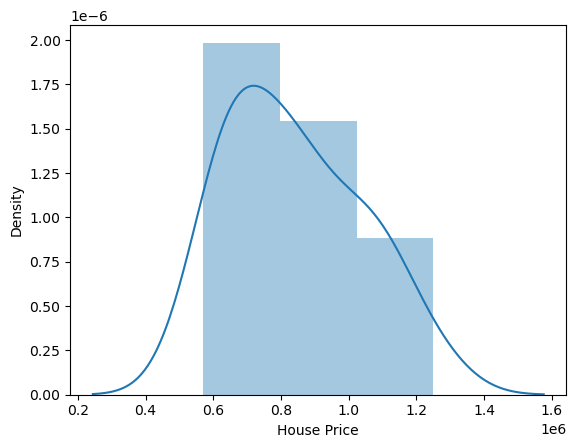

In [8]:
sns.distplot(df_raw['House Price'])

# Linear Regression Model

**Declare the inputs and outputs**

In [9]:
target = df_raw['House Price']
inputs = df_raw.drop(['House Price','Number of Rooms','State'],axis=1)
inputs
# we keep only 'year of construction', 'state: numbers' and 'House Size (sq.ft.)' as independent variables

,House Size (sq.ft.),Year of Construction,State: Numbers
0,1940,2002,0
1,1300,1992,0
2,1420,1987,0
3,1680,2000,0
4,1270,1995,0
5,1850,1998,0
6,1000,2015,0
7,1100,2014,1
8,1600,2017,1
9,1000,1997,2


**Scale the data**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

**Create the regression**

In [11]:
reg = LinearRegression()
reg.fit(inputs_scaled,target)
y_hat = reg.predict(inputs_scaled)
reg.score(inputs_scaled,target)

0.7365050213305117

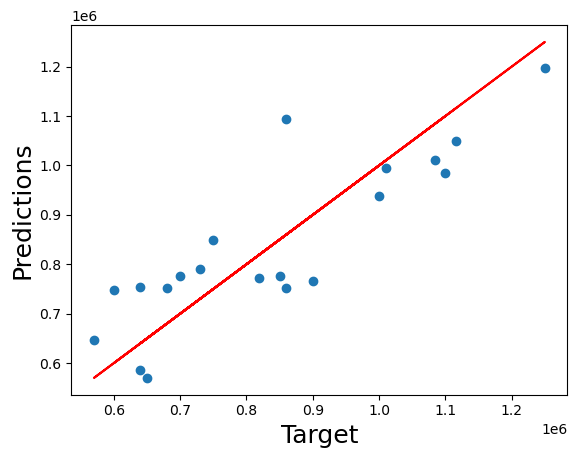

In [12]:
plt.scatter(target, y_hat)
plt.plot(target, target,color="red")
plt.xlabel('Target',size=18)
plt.ylabel('Predictions',size=18)
plt.show()

In [13]:
X = df_raw[['Year of Construction','State: Numbers','House Size (sq.ft.)']]
Y = df_raw['House Price']
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.91
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           6.79e-05
Time:                        22:51:51   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.582e+06   5.36e+06     -1.788      0.093   -2.09e+07    1.78e+06
Year of Construction  4933.0356   2680.202      1.841      0.084    -748.739    1.06e+04
State: Numbers       -6432.6701   1.98e+04     -0.326      0.749   -4.83e+04    3.55e+04
House Size (sq.ft.)    389.5423     64.274      6.061      0.000     253.288     525.797
==============================================================================
Omnibus:                        2.014   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.679
Skew:                          -0.647   Prob(JB):                        0.432
Kurtosis:                       2.416   Cond. No.                     5.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df_com = pd.DataFrame(y_hat.reshape(-1,1),columns=['Prediction'])
df_com['real'] = Y
df_com['error%'] = 100*(df_com['Prediction'] - df_com['real'])/df_com['real']

In [15]:
df_com

,Prediction,real,error%
0,1.049762e+06,1116000,-5.935334
1,7.511242e+05,860000,-12.659974
2,7.732041e+05,818400,-5.522467
3,9.386146e+05,1000000,-6.138541
4,7.542371e+05,640000,17.849541
5,9.949707e+05,1010000,-1.488048
6,7.477214e+05,600000,24.620225
7,7.753099e+05,700000,10.758554
8,9.848801e+05,1100000,-10.465442
9,6.460614e+05,570000,13.344100
